In [1]:
import pandas as pd
import numpy as np
import itertools
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/docketrun/Detecting-Fake-News-with-Scikit-Learn/master/data/fake_or_real_news.csv')

In [4]:
y = df.label

In [5]:
df = df.drop('label', axis=1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)

In [7]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [8]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [9]:
mn_count_clf = MultinomialNB(alpha=0.1)

In [10]:
mn_count_clf.fit(count_train, y_train)
pred = mn_count_clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.893


In [11]:
mn_tfidf_clf = MultinomialNB(alpha=0.1)

In [12]:
mn_tfidf_clf.fit(tfidf_train, y_train)
pred = mn_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.898


In [13]:
pa_tfidf_clf = PassiveAggressiveClassifier(n_iter=50)

In [14]:
pa_tfidf_clf.fit(tfidf_train, y_train)
pred = pa_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy:   0.936


In [15]:
svc_tfidf_clf = LinearSVC()

In [16]:
svc_tfidf_clf.fit(tfidf_train, y_train)
pred = svc_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.936


In [17]:
sgd_tfidf_clf = SGDClassifier()

In [19]:
sgd_tfidf_clf.fit(tfidf_train, y_train)
pred = sgd_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.936


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [21]:
sgd_tfidf_clf.decision_function?

In [22]:
mn_count_clf.predict_proba?

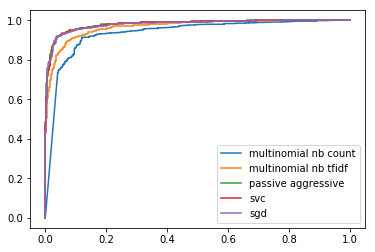

In [23]:
plt.figure(0).clf()

for model, name in [ (mn_count_clf, 'multinomial nb count'),
                     (mn_tfidf_clf, 'multinomial nb tfidf'),
                     (pa_tfidf_clf, 'passive aggressive'),
                     (svc_tfidf_clf, 'svc'),
                     (sgd_tfidf_clf, 'sgd')]:
    if 'count' in name:
        pred = model.predict_proba(count_test)[:,1]
    elif 'multinomial' in name:
        pred = model.predict_proba(tfidf_test)[:,1]
    else: 
        pred = model.decision_function(tfidf_test)
    fpr, tpr, thresh = metrics.roc_curve(y_test.values, pred, pos_label='REAL')
    plt.plot(fpr,tpr,label="{}".format(name))

plt.legend(loc=0)

In [24]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472
    
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    
    Modified by @kjam to support a dict return.
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    return {class_labels[0]: topn_class1,
            class_labels[1]: topn_class2
    }


most_informative_feature_for_binary_classification(tfidf_vectorizer, pa_tfidf_clf, n=10)

{'FAKE': [(-5.048500679941329, u'2016'),
  (-4.269699164929923, u'october'),
  (-4.158915894847866, u'hillary'),
  (-3.2002098980900846, u'share'),
  (-2.9768612844928812, u'article'),
  (-2.8523343543671005, u'november'),
  (-2.564549699881129, u'print'),
  (-2.371979740677772, u'oct'),
  (-2.3007350853228345, u'advertisement'),
  (-2.2723861538232932, u'email')],
 'REAL': [(2.2306526671320075, u'conservative'),
  (2.2815638458243326, u'candidates'),
  (2.2895186971128108, u'islamic'),
  (2.377740047905049, u'friday'),
  (2.3801194001864774, u'gop'),
  (2.5513252810622022, u'marriage'),
  (2.582805630993222, u'says'),
  (2.6351308322206335, u'cruz'),
  (2.6488565846653653, u'tuesday'),
  (4.782565888778174, u'said')]}

In [25]:
classifiers = [(mn_count_clf, count_vectorizer),
               (mn_tfidf_clf, tfidf_vectorizer),
               (pa_tfidf_clf, tfidf_vectorizer),
               (svc_tfidf_clf, tfidf_vectorizer),
               (sgd_tfidf_clf, tfidf_vectorizer)]

In [26]:
results = {}
for clf, vct in classifiers:
    results[clf] = most_informative_feature_for_binary_classification(vct, clf, n=10)

In [27]:
results

{LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
      intercept_scaling=1, loss='squared_hinge', max_iter=1000,
      multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
      verbose=0): {'FAKE': [(-2.573681382711627, u'2016'),
   (-2.533978435847387, u'hillary'),
   (-2.2832618967448064, u'october'),
   (-1.7249565106480682, u'article'),
   (-1.7001447830517018, u'november'),
   (-1.6804830060861122, u'share'),
   (-1.4613005734374134, u'election'),
   (-1.3994871873353043, u'print'),
   (-1.3618723027392317, u'war'),
   (-1.3083291802268247, u'advertisement')],
  'REAL': [(1.3417962233922978, u'friday'),
   (1.3487557998271646, u'monday'),
   (1.3541837791647748, u'cruz'),
   (1.3789183219344108, u'gop'),
   (1.3919828409493944, u'candidates'),
   (1.4222355856849946, u'conservative'),
   (1.4570598687804395, u'islamic'),
   (1.5834319591516754, u'says'),
   (1.680511232442531, u'tuesday'),
   (3.4802127017914564, u'said')]},
 MultinomialNB(alpha=0.1,

In [28]:
comparable_results = {'REAL': {}, 'FAKE': {}}
for clf, data in results.items():
    clf_name = clf.__class__.__name__
    for label, features in data.items():
        for rank, score_tuple in enumerate(features):
            if score_tuple[1] in comparable_results[label]:
                comparable_results[label][score_tuple[1]].append((rank + 1, clf_name))
            else:
                comparable_results[label][score_tuple[1]] = [(rank + 1, clf_name)]


In [29]:
comparable_results['FAKE']

{u'0000': [(1, 'MultinomialNB'), (1, 'MultinomialNB')],
 u'000035': [(2, 'MultinomialNB'), (2, 'MultinomialNB')],
 u'0001': [(3, 'MultinomialNB'), (3, 'MultinomialNB')],
 u'0001pt': [(4, 'MultinomialNB'), (4, 'MultinomialNB')],
 u'000km': [(5, 'MultinomialNB'), (5, 'MultinomialNB')],
 u'0011': [(6, 'MultinomialNB'), (6, 'MultinomialNB')],
 u'006s': [(7, 'MultinomialNB'), (7, 'MultinomialNB')],
 u'007': [(8, 'MultinomialNB'), (8, 'MultinomialNB')],
 u'007s': [(9, 'MultinomialNB'), (9, 'MultinomialNB')],
 u'008s': [(10, 'MultinomialNB'), (10, 'MultinomialNB')],
 u'2016': [(2, 'SGDClassifier'),
  (1, 'LinearSVC'),
  (1, 'PassiveAggressiveClassifier')],
 u'advertisement': [(10, 'SGDClassifier'),
  (10, 'LinearSVC'),
  (9, 'PassiveAggressiveClassifier')],
 u'article': [(4, 'SGDClassifier'),
  (4, 'LinearSVC'),
  (5, 'PassiveAggressiveClassifier')],
 u'election': [(6, 'SGDClassifier'), (7, 'LinearSVC')],
 u'email': [(10, 'PassiveAggressiveClassifier')],
 u'hillary': [(1, 'SGDClassifier'),
  

In [30]:
agg_results = {}
for label, features in comparable_results.items():
    for feature, ranks in features.items():
        if feature in agg_results:
            print("WARNING! DUPLICATE LABEL!!! {}".format(feature))
        agg_results[feature] = {
            'label': label,
            'agg_rank': np.mean([r[0] for r in ranks]),
            'count': len(ranks)
        }

In [31]:
comparison_df = pd.DataFrame(agg_results).T

In [32]:
comparison_df.head()

,agg_rank,count,label
0000,1,2,FAKE
000035,2,2,FAKE
0001,3,2,FAKE
0001pt,4,2,FAKE
000km,5,2,FAKE


In [33]:
comparison_df[comparison_df['label'] == 'REAL'].sort_values('count', ascending=0).head(10)

,agg_rank,count,label
said,9.8,5,REAL
cruz,4,4,REAL
says,7.66667,3,REAL
friday,2.66667,3,REAL
tuesday,9,3,REAL
conservative,4.33333,3,REAL
islamic,5.66667,3,REAL
clinton,8,2,REAL
gop,4.5,2,REAL
republican,2,2,REAL


In [34]:
comparison_df[comparison_df['label'] == 'FAKE'].sort_values('count', ascending=0).head(10)

,agg_rank,count,label
advertisement,9.66667,3,FAKE
2016,1.33333,3,FAKE
share,6,3,FAKE
print,7.33333,3,FAKE
october,2.66667,3,FAKE
november,5.33333,3,FAKE
hillary,2,3,FAKE
article,4.33333,3,FAKE
election,6.5,2,FAKE
000035,2,2,FAKE


In [35]:
feature_names = count_vectorizer.get_feature_names()
for idx, ftr_weight in enumerate(sorted(zip(mn_count_clf.coef_[0], feature_names))):
    if ftr_weight[0] <= -16.067750538483136:
        continue
    print(idx, ftr_weight)
    break

(20161, (-13.669855265684765, u'00000031'))
